# Kidney: Weibull regression with random efects
**Objective** : The objective of this study is to analyze time to first and second recurrence of infection in kidney patients on dialysis. The analysis uses a Weibull regression model with random effects and includes age, sex, and underlying disease as risk variables. The aim is to identify the risk factors associated with recurrence of infection in kidney patients.

## 1. Data

Description : 
- $t_{ij}$ : is the survivor function for i = 1,...,38; j = 1,2 
- $b_i$ : is an additive random effect for each patient in the exponent of the hazard 
- $AGE_{ij}$ :  
- $SEX_i$ :
- $Disease_{ik}(k = 1,2,3)$ 

In [33]:
import numpy as np
import pandas as pd
from tqdm import trange
from typing import Tuple
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gamma, norm, truncnorm, weibull_min


In [4]:
NP = 38 # Number of pations 
N_uc = 58 
N_rc = 18 

t_uc = np.asarray([8, 23, 22, 447, 30, 24, 7, 511, 53, 15, 7, 141, 96, 536, 17, 
185, 292, 15, 152, 402, 13, 39, 12, 132, 34, 2, 130, 27, 152, 
190, 119, 63, 16, 28, 318, 12, 245, 9, 30, 196, 154, 333, 38, 
177, 114, 562, 66, 40, 201, 156, 30, 25, 26, 58, 43, 30, 8, 78])

t_rc = np.asarray([149, 22, 113, 5, 54, 6, 13, 8, 70, 25, 4, 159, 108, 24, 46, 
5, 16, 8])

age_uc = np.asarray([28, 48, 32, 31, 10, 16, 51, 55, 69, 51, 44, 34, 35, 17, 60, 
60, 43, 44, 46, 30, 62, 42, 43, 10, 52, 53, 54, 56, 57, 44, 22, 
60, 28, 32, 32, 10, 17, 51, 56, 69, 52, 44, 35, 60, 44, 47, 63, 
43, 58, 10, 52, 53, 54, 56, 51, 57, 22, 52])

age_rc = np.asarray([42, 53, 57, 50, 42, 52, 48, 34, 42, 17, 60, 53, 44, 30, 43, 
45, 42, 60])

sex_uc = np.asarray([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 
1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 
1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

sex_rc = np.asarray([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

patient_uc = np.asarray([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 
16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 
31, 33, 34, 35, 38, 1, 3, 4, 5, 6, 7, 8, 9, 10, 
11, 13, 17, 18, 21, 23, 25, 26, 27, 28, 29, 30, 31, 
32, 33, 35, 37])

patient_rc = np.asarray([14, 19, 26, 32, 36, 37, 2, 12, 14, 15, 16, 19, 
20, 22, 24, 34, 36, 38])

disease_uc = np.asarray([1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 1, 1, 4, 1, 
3, 3, 3, 2, 3, 2, 2, 3, 4, 2, 1, 4, 1, 1, 1, 1, 1, 2, 2, 3, 2, 
3, 3, 1, 1, 4, 3, 3, 3, 2, 3, 2, 2, 3, 3, 4, 1, 4])

disease_rc = np.asarray([3, 2, 3, 3, 1, 4, 2, 1, 3, 1, 3, 2, 1, 1, 3, 2, 1, 4])


In [5]:
df_rc = pd.DataFrame({'disease' : disease_rc, \
                    'patient' : patient_rc,\
                    'sex' : sex_rc ,\
                    'age' : age_rc, \
                    't' : t_rc, })

df_uc = pd.DataFrame({'disease' : disease_uc, \
                    'patient' : patient_uc,\
                    'sex' : sex_uc , \
                    'age' : age_uc , \
                    't' : t_uc})

df_rc.reset_index(drop=True, inplace=True)
df_uc.reset_index(drop=True, inplace=True)
#df_rc

In [5]:
df_uc

,disease,patient,sex,age,t
0,1,1,0,28,8
1,2,2,1,48,23
2,1,3,0,32,22
3,1,4,1,31,447
4,1,5,0,10,30
5,1,6,1,16,24
6,2,7,0,51,7
7,2,8,1,55,511
8,3,9,1,69,53
9,2,10,0,51,15


In [6]:
df_rc

,disease,patient,sex,age,t
0,3,14,1,42,149
1,2,19,1,53,22
2,3,26,1,57,113
3,3,32,1,50,5
4,1,36,1,42,54
5,4,37,1,52,6
6,2,2,1,48,13
7,1,12,1,34,8
8,3,14,1,42,70
9,1,15,1,17,25


In [24]:
df[df["patient"]==14]["t"].values


array([149,  70])

In [16]:

df_rc["censored"]=1
df_uc["censored"]=0
df_rc.sort_values(by="patient", inplace=True)
df_uc.sort_values(by="patient", inplace=True)

In [17]:
df = pd.concat([df_rc, df_uc], axis = 0)

In [20]:
df_rc.patient.unique

<bound method Series.unique of 6      2
7     12
0     14
8     14
9     15
10    16
1     19
11    19
12    20
13    22
14    24
2     26
3     32
15    34
4     36
16    36
5     37
17    38
Name: patient, dtype: int32>

# Model 

-   $t_{ij} \sim \text{Weibull}(r,\mu_{ij})$
- $\text{log}(\mu_{ij}) = \alpha + \beta_\text{age}Age_{ij} +\beta_\text{sex}SEX_{i} + \beta_\text{disease1}DISEASE_{i1} + \beta_\text{disease2}DISEASE_{i2} + \beta_\text{disease3}DISEASE_{i3} + b_i$ 

# Random effects
-   $b_i \sim \text{Normal}(0,\tau)$.

# Priors
-  $alpha \sim \text{Normal}(0,10^{-4})$.
-  $beta_{age} \sim \text{Normal}(0,10^{-4})$
-  $beta_{sex} \sim \text{Normal}(0,10^{-4})$
-  $beta_{disease1} = 0$ 
-  $beta_{diseasek} \sim \text{Normal}(0,10^{-4})$ for k=1,2,3 
- $\tau \sim \text{gamma}(10^{-4},10^{-4})$ 
- $r \sim \text{gamma}(1,10^{-3})$ 
- $\sigma = \frac{1}{\sqrt(\tau)}$ : s.d. of random effects

In [29]:
def init_chain_1(n_patients):
    """
     Proposed 1st initialisation by the authors of the paper    
    """
    beta_age = 0
    beta_sex = 0 
    beta_disease=np.zeros(3)
    alpha = 0
    r=1 
    tau=0.3
    b=np.zeros(n_patients)
    return alpha, beta_age, beta_sex, beta_disease, r, tau, b

def init_chain_2(n_patients):
    """
     Proposed 2nd initialisation by the authors of the paper    
    """
    beta_age= -1
    beta_sex = 1
    beta_disease= np.ones(3)
    alpha = 1
    r= 1.5
    tau = 1
    b=np.zeros(n_patients)

    return alpha, beta_age, beta_sex, beta_disease, r, tau, b

In [46]:
def metropolis_hasting_logp(logp, proposal, theta, logp_current=None, args=None):
    # U for acceptance
    U = np.random.rand()
    if logp_current is None:
        logp_current = logp(theta, *args)
    
    theta_proposed = proposal(theta)
    logp_proposed = logp(theta_proposed, *args)
    accept_ratio = np.exp(logp_proposed - logp_current)
    
    if U < accept_ratio:
        return theta_proposed, logp_proposed
    else:
        return theta, logp_current

def weibull_log_likelihood(x, r, mu):
    return np.sum((1-censored)*(r * np.log(x / mu) - (x / mu) ** r) + censored*(-(x/mu)**r))

def logp_alpha(alpha, t, r, mu):
    p_alpha = norm.pdf(alpha, loc=0, scale=100)
    mu = mu * np.exp(alpha)
    return np.log(p_alpha) + weibull_log_likelihood(t, r, mu)

def logp_beta(beta, t, r, mu, X):
    p_beta = norm.pdf(beta, loc=0, scale=100)
    mu = mu * np.exp(beta)
    return np.log(p_beta) + weibull_log_likelihood(t, r, mu)

def logp_r(r, t, mu, X=False):
    p_r = gamma.pdf(r, 1, 1e-04) 
    mu = mu * np.exp(r)
    return weibull_log_likelihood(t, r, mu)+np.log(p_r)

def gibbs_sampler(data, n_iter):

    # Data
    disease, patient, sex, age, t, censored = data['disease'].values, data['patient'].values, data['sex'].values, data['age'].values, data['t'].values, data['censored'].values

#     N_uc, N_rc, t_uc, t_rc, age_uc, age_rc, sex_uc, sex_rc, disease_uc, disease_rc = data
    n_patients = np.max(patient)
    
    # Initialize parameters    
    alpha, beta_age, beta_sex, beta_disease, r, tau, b= init_chain_1(n_patients)
    
    # chaine
    chaine = {'alpha': np.zeros(n_iter+1),
             'beta_age': np.zeros(n_iter+1),
             'beta_sex': np.zeros(n_iter+1),
             'beta_disease': np.zeros((n_iter+1, 3)),
             'tau': np.zeros(n_iter+1),
             'b': np.zeros((n_iter+1, n_patients)),
             'r': np.zeros(n_iter+1)}


    # Begining of the chains : 
    chaine["alpha"][0] = alpha
    chaine["beta_age"][0] = beta_age
    chaine["beta_sex"][0] = beta_sex
    chaine["beta_disease"][0, :] = beta_disease
    chaine["tau"][0] = tau
    chaine["b"][0, :] = b
    chaine["r"][0] = r

    # mu for uncensored and censored
#     mu_uc = np.exp(alpha + beta_age * age_uc + beta_sex * sex_uc + np.dot((disease_uc - 1)[:, None] == np.arange(3), beta_disease) + b[patient_uc - 1])
    # mu_rc = np.exp(alpha + beta_age * age_rc + beta_sex * sex_rc + np.dot((disease_rc - 1)[:, None] == np.arange(3), beta_disease) + b[patient_rc - 1])
    
    mu = np.exp(alpha + beta_age * age + beta_sex * sex + np.dot((disease - 1)[:, None] == np.arange(3), beta_disease) + b[patient - 1])

    
    for iter in trange(1,n_iter+1):

        # Update alpha
        
        alpha, _ = metropolis_hasting_logp(logp_alpha, lambda x: x + np.random.normal(scale=0.1), alpha, args=(t, r, mu))
        
        mu = mu * np.exp(alpha)/np.exp(chaine['alpha'][iter-1])
        # mu_rc = mu_rc * np.exp(alpha)


        # Update beta_age
        beta_age, _ = metropolis_hasting_logp(logp_beta, lambda x: x + np.random.normal(scale=0.1), beta_age, args=(t, r, mu, age))
        mu = mu * np.exp(age * beta_age)/np.exp(age * chaine['beta_age'][iter-1])
        # mu_rc = mu_rc * np.exp(age_rc * beta_age)

        # Update beta_sex
        beta_sex, _ = metropolis_hasting_logp(logp_beta, lambda x: x + np.random.normal(scale=0.1), beta_sex, args=(t, r, mu, sex))
        mu =    mu * np.exp(sex * beta_sex)/np.exp(sex * chaine['beta_sex'][iter-1])
        # mu_rc =   mu_rc * np.exp(sex_rc * beta_sex)

        # Update beta_disease
        for j in range(3):
            beta_disease[j], _ = metropolis_hasting_logp(logp_beta, lambda x: x + np.random.normal(scale=0.1), beta_disease[j], args=(t[disease == j + 1], r, mu[disease == j + 1], 1))
            mu[disease == j + 1] = mu[disease == j + 1] * np.exp(beta_disease[j])/np.exp(chaine['beta_disease'][iter-1,j])
            # mu_rc[disease_rc == j + 1] = mu_rc[disease_rc == j + 1] * np.exp(beta_disease[j])
    
        # Update tau
        a = 1e-4
        tau = gamma.rvs(loc=n_patients/2 + a, scale=1 / (1/2*(np.sum(b**2) + a))) # verify this
        
        # Update b
        for i in patient:

            prop = b[i-1] + norm.rvs(scale=0.1)
            mu_prop = mu*np.exp(prop)/np.exp(b[i-1])
                        
            x = data[data["patient"]==i]["t"].values
            cens = data[data["patient"]==i]["censored"].values         
            
            
            top = np.log(norm.pdf(prop, loc=0, scale=1/np.sqrt(tau))) + np.sum((1-cens)*(r * np.log(x
 / mu_prop) - (x / mu_prop) ** r) + cens*(-(x/mu_prop)**r)) # a verif
                        
            bottom = np.log(norm.pdf(b[i], loc=0, scale=1/np.sqrt(tau))) + np.sum((1-cens)*(r * np.log(x
 / mu) - (x / mu) ** r) + cens*(-(x/mu)**r))
                        
            accept_ratio = np.exp(top - bottom)
            U = np.random.rand()
            if U < accept_ratio:
                b[i-1] = prop
                        
            mu[patient == i] = mu[patient == i]*np.exp(b[i-1])/np.exp(chaine['b'][iter-1, i-1])
                        
#             mu_uc[patient_uc == j + 1] = mu_uc[patient_uc == j + 1] * np.exp(b[j])
            # mu_rc[patient_rc == j + 1] = mu_rc[patient_rc == j + 1] * np.exp(b[j])
        
        #  Update r
        # r = weibull_min.fit(t_uc / mu_uc, floc=0)[0] 
        r, _ = metropolis_hasting_logp(logp_r, lambda x: x + np.random.normal(scale=0.1), r, args=(t, r, mu))
        mu =    mu * np.exp(r)/np.exp(chaine['r'][iter-1])
        # mu_rc =   mu_rc * np.exp(sex_rc * beta_sex)


        # Update the entire chaine
        chaine['alpha'][iter] = alpha
        chaine['beta_age'][iter] = beta_age
        chaine['beta_sex'][iter] = beta_sex
        chaine['beta_disease'][iter, :] = beta_disease
        chaine['tau'][iter] = tau
        chaine['b'][iter, :] = b
        chaine['r'][iter] = r
        
    return chaine 


In [47]:
n_iter = int(100)
chaine = gibbs_sampler(df, n_iter)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (76,) (26,) 

In [119]:
# Removing burn in 
burnin= 10
beta_disease_0 = chaine["beta_disease"][burnin:, 0]
beta_disease_1 = chaine["beta_disease"][burnin:, 1]
beta_disease_2 = chaine["beta_disease"][burnin:, 2]
alpha = chaine["alpha"][burnin:]
beta_age = chaine["beta_age"][burnin:]
beta_sex = chaine["beta_sex"][burnin:]
tau = chaine["tau"][burnin:]
b = chaine["b"][burnin:,]
r = chaine["r"][burnin:]

In [120]:
results = pd.DataFrame({
    "alpha":alpha,
    "beta_age":beta_age,
    "beta_sex":beta_sex,
    "beta_disease_0":beta_disease_0,
    "beta_disease_1":beta_disease_1,
    "beta_disease_2":beta_disease_2,
    "tau":tau,
    "r":r
})

df = results.describe().T
df

,count,mean,std,min,25%,50%,75%,max
alpha,91.0,-0.456907,0.359582,-1.306752,-0.631345,-0.389706,-0.208003,0.228609
beta_age,91.0,-0.001862,0.196070,-0.500071,-0.087659,-0.031011,0.154293,0.342049
beta_sex,91.0,0.403424,0.364635,-0.200432,0.090344,0.400634,0.549379,1.455748
beta_disease_0,91.0,-0.355673,0.581701,-1.465275,-0.861680,-0.297816,0.265258,0.461195
beta_disease_1,91.0,-0.169597,0.420764,-1.028538,-0.546351,-0.031399,0.152434,0.416570
beta_disease_2,91.0,-0.028075,0.232821,-0.487774,-0.212049,-0.014050,0.137637,0.476102
tau,91.0,3.939084,4.494511,0.151490,0.905466,2.306003,4.853434,23.700959
r,91.0,0.016406,0.006051,0.007553,0.011527,0.016025,0.020204,0.030316


In [121]:
def plot(variable, ax):
    """ Function to plot the Markov chain for a given variable.
    """
    sns.lineplot(
        data=results,
        x=results.index,
        y=variable,
        ax =ax,
    )

    # Add mean line
    mean = results[variable].mean()
    std = results[variable].std()
    ax.axhline(y=mean, color="r", linestyle="--", label="Mean")
    ax.axhline(y=mean+std, color="b", linestyle="--", label="+std", alpha = 0.5)
    ax.axhline(y=mean-std, color="b", linestyle="--", label="-std", alpha = 0.5)

    ax.fill_between(results.index, mean-std, mean+std, alpha=0.2)

In [122]:
results_columns_1 = ['alpha', 'beta_age', 'beta_sex',  'r']

results_columns_2 = ['beta_disease_0', 'beta_disease_1',
       'beta_disease_2', 'tau']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


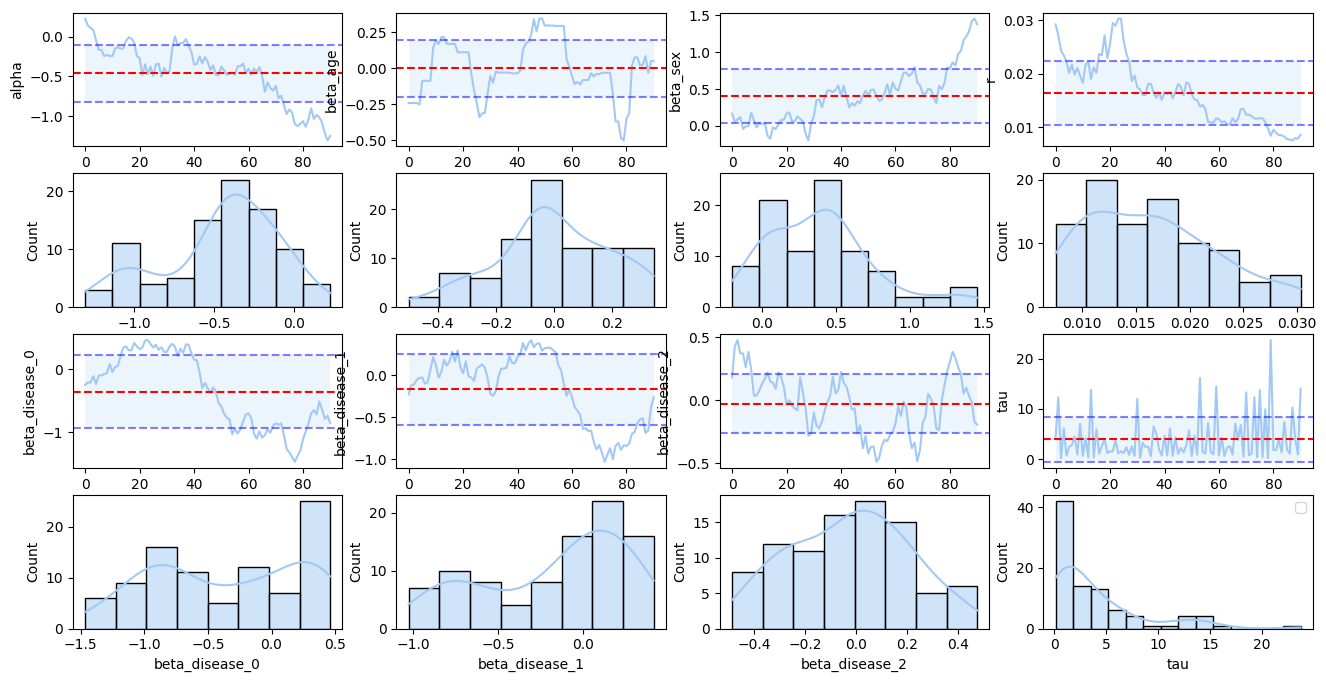

<Figure size 640x480 with 0 Axes>

In [125]:
sns.set_palette("pastel")

fig, axs = plt.subplots(4,4)
fig.set_size_inches(16,8)


for i, variable in enumerate(results_columns_1):
    plot(variable, axs[0][i] )
    sns.histplot(results, x=variable, kde="True", fill=True,ax=axs[1][i])

for i, variable in enumerate(results_columns_2):
    plot(variable, axs[2][i] )
    sns.histplot(results, x=variable, kde="True", fill=True,ax=axs[3][i])


plt.legend()
plt.show()
plt.savefig("Docs/plots.png")